In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13285719152595470413
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5744099328
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7681667224299134043
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

# student-mat(수학)

In [3]:
df1 = pd.read_csv('C:/Users/yc_hur/Desktop/DBA/dataset/student-mat.csv', sep=';')
df1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
df1.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## 각 컬럼별 의미
- school: 학교 이름 (이진 변수: Gabriel Pereira(GP) 또는 Mousinho da Silveira(MS))
- sex: 학생의 성별(이진 변수: Female(F) 또는 Male(M))
- age: 학생 나이 (15세에서 22세까지 정수형)
- address: 거주지 유형 (이진 변수: Urban(U) 또는 Rural(R))
- famsize: 가족 크기 (이진 변수: LE3(3명 이하) 또는 GT3(3명 초과))
- Pstatus: 부모 동거 상태 (이진 변수: Together(T) 또는 Apart(A))
- Medu, Fedu: 부모의 교육 수준 (0~4, 0은 교육 없음, 4는 대학 졸업)
- Mjob, Fjob: 부모의 직업 (교사, 의료직, 공무원, 가정주부, 기타)
- traveltime: 집에서 학교까지의 통학 시간 (1: 15분 미만 ~ 4: 1시간 이상)
- studytime: 주간 학습 시간 (1: 2시간 미만 ~ 4: 10시간 이상)
- failures: 과거 수업 낙제 횟수 (0~3 이상은 4로 처리)
- schoolsup: 추가 교육 지원 여부 (예/아니오)
- famsup: 가족의 교육 지원 여부 (예/아니오)
- paid: 추가 과외 수업 여부 (예/아니오)
- activities: 방과 후 활동 참여 여부 (예/아니오)
- nursery: 유치원 다닌 경험 (예/아니오)
- higher: 고등 교육 희망 여부 (예/아니오)
- internet: 집에서 인터넷 사용 가능 여부 (예/아니오)
- romantic: 연애 중인지 여부 (예/아니오)
- famrel: 가족 관계의 질 (1: 매우 나쁨 ~ 5: 매우 좋음)
- freetime: 방과 후 자유 시간 (1: 매우 적음 ~ 5: 매우 많음)
- goout: 친구들과 외출 빈도 (1: 거의 없음 ~ 5: 매우 잦음)
- Dalc, Walc: 평일 및 주말의 음주량 (1: 거의 없음 ~ 5: 매우 많음)
- health: 현재 건강 상태 (1: 매우 나쁨 ~ 5: 매우 좋음)
- absences: 결석 일수 (0~93)
- G1: 1학기 성적 (0~20)
- G2: 2학기 성적 (0~20)
- G3: 최종 성적 (0~20, Label)

In [5]:
df1.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
df1['G3'].value_counts()

G3
10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: count, dtype: int64

In [8]:
# G3 값이 20 또는 4가 아닌 행만 필터링
df1 = df1[~df1['G3'].isin([20, 4])]

In [9]:
df1 =pd.get_dummies(df1, columns= ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'], drop_first=True)

In [10]:
df1

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,False,True,False,True,True,False,True,True,False,False
391,17,3,1,2,1,0,2,4,5,3,...,True,False,False,False,False,False,False,True,True,False
392,21,1,1,1,1,3,5,5,3,3,...,False,True,False,False,False,False,False,True,False,False
393,18,3,2,3,1,0,4,4,1,3,...,True,False,False,False,False,False,False,True,True,False


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, 0 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                393 non-null    int64
 1   Medu               393 non-null    int64
 2   Fedu               393 non-null    int64
 3   traveltime         393 non-null    int64
 4   studytime          393 non-null    int64
 5   failures           393 non-null    int64
 6   famrel             393 non-null    int64
 7   freetime           393 non-null    int64
 8   goout              393 non-null    int64
 9   Dalc               393 non-null    int64
 10  Walc               393 non-null    int64
 11  health             393 non-null    int64
 12  absences           393 non-null    int64
 13  G1                 393 non-null    int64
 14  G2                 393 non-null    int64
 15  G3                 393 non-null    int64
 16  school_MS          393 non-null    bool 
 17  sex_M              39

In [12]:
X = df1.drop(['G3'], axis=1)

In [13]:
X = X*1

In [14]:
y = df1['G3']

In [15]:
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
## 훈련 데이터 나누기
X_train, X_test, y_train, y_test =train_test_split(X_scaled,y, test_size=0.2, random_state=111)

In [21]:
print(X_train.shape)
print(y_train.shape)

(314, 41)
(314,)


In [22]:
#모델 학습
model =LogisticRegression(max_iter=500)

In [23]:
# Stratified K-Fold 교차 검증
cv = StratifiedKFold(n_splits=3)

# SFS를 통한 FeatureSelection

In [25]:
#SequentialFeatureSelector
#SFS (모델을 선정할 때 어떤 방법으로 선정할지, 선정방법, scoring =어떤 평가로 볼건지?, cv= 교차검증값들)

sfs_forward =SFS(model, k_features='best', forward=True, floating= False, scoring='accuracy',cv=cv)
sfs_backward =SFS(model, k_features='best', forward=False, floating= False, scoring='accuracy',cv=cv)
sfs_stepwise =SFS(model, k_features='best', forward=True, floating= True, scoring='accuracy',cv=cv)


# 각 방법을 학습하고 확인해 보기 
sfs_forward_f=sfs_forward.fit(X_train, y_train)
sfs_backward_f=sfs_backward.fit(X_train, y_train)
sfs_stepwise_f=sfs_stepwise.fit(X_train, y_train)

In [26]:
#선택된 특성 출력

print('sfs_forward 피처 출력')
print(sfs_forward_f.k_feature_names_)

print('sfs_backward 피처 출력')
print(sfs_backward_f.k_feature_names_)

print('sfs_stepwise 피처 출력')
print(sfs_stepwise_f.k_feature_names_)

sfs_forward 피처 출력
('14', '30', '33', '38')
sfs_backward 피처 출력
('12', '14', '18', '26', '36', '37')
sfs_stepwise 피처 출력
('0', '12', '14', '30', '36')


In [29]:
# 데이터프레임 열 이름 확인
print("Feature columns:", df1.columns)

# SFS 결과
sfs_forward = ('14', '30', '33', '38')
sfs_backward = ('12', '14', '18', '26', '36', '37')
sfs_stepwise = ('0', '12', '14', '30', '36')

# 인덱스를 열 이름으로 변환
sfs_forward_names = [df1.columns[int(i)] for i in sfs_forward]
sfs_backward_names = [df1.columns[int(i)] for i in sfs_backward]
sfs_stepwise_names = [df1.columns[int(i)] for i in sfs_stepwise]

print("SFS Forward Selected Features:", sfs_forward_names)
print("SFS Backward Selected Features:", sfs_backward_names)
print("SFS Stepwise Selected Features:", sfs_stepwise_names)

Feature columns: Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')
SFS Forward Selected Features: ['G2', 'reason_other', 'guardian_other', 'nursery_yes']
SFS Backward Selected Features: ['absences', 'G2', 'address_U', 'Fjob_other', 'paid_yes', 'activities_yes']
SFS Stepwise Selected Features: ['age', 'absences', 'G2', 'reason_other', 'paid_yes']


## 선택된 Features (중복되면 설명 X)
- SFS Forward
     - G2: 2학기성적
     - reason_other: 학교 선택 이유(기타 사유)
     - guardian_other: 보호자(어머니 아버지가 아닌 경우)
     - nursery_yes: 유치원 다님 여부
   
- SFS Backward
     - absences: 결석 횟수
     - G2
     - address_U: 주거지 유형(도시)
     - Fjob_other: 아버지 직업('교사', '보건', '서비스'가 아닌 경우)
     - paid_yes: 과외 수업 수강 여부
     - activities_yes: 방과후 활동 참여 여부
   
- SFS Stepwise
     - age: 학생 나이
     - absences
     - G2
     - reanson_other
     - paid_yes

Text(0.5, 1.0, 'sfs_stepwise')

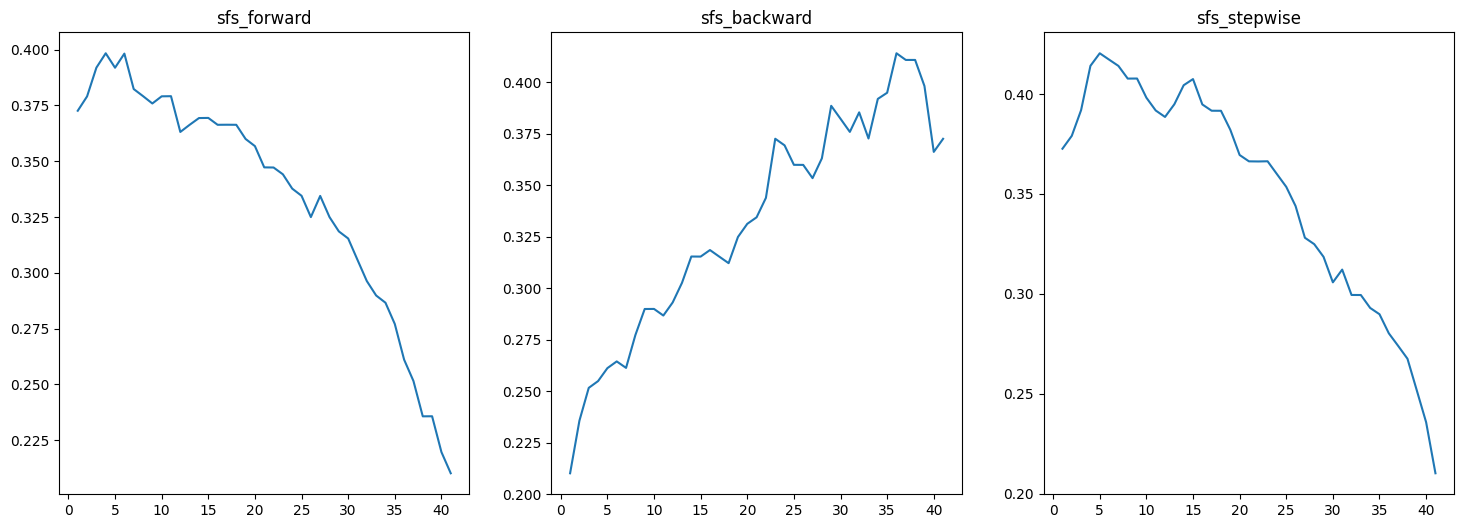

In [30]:
#시각화를 통해서 피처를 선택했을 때 어떤 식의 평가나오는지

fig, ax= plt.subplots(1,3, figsize=(18,6))
ax[0].plot(range(1, len(sfs_forward_f.subsets_)+1),[sfs_forward_f.subsets_[i]['avg_score'] for i in sfs_forward_f.subsets_],)
ax[0].set_title('sfs_forward')

ax[1].plot(range(1, len(sfs_backward_f.subsets_)+1),[sfs_backward_f.subsets_[i]['avg_score'] for i in sfs_backward_f.subsets_],)
ax[1].set_title('sfs_backward')

#fig, ax= plt.subplots(1,3, figsize=(18,6))
ax[2].plot(range(1, len(sfs_stepwise_f.subsets_)+1),[sfs_stepwise_f.subsets_[i]['avg_score'] for i in sfs_stepwise_f.subsets_],)
ax[2].set_title('sfs_stepwise')

## 피처 선택
- 공통 피처:
  - G2(2학기 성적, 모든 방법에서 선정된 가장 중요한 특징), absences(결석 횟수), paid_yes(과외 수업 여부), reason_other(학교 선택여부)
  - 세 방법 중 2개 이상에서 선택된 위 네가지 피처 중 G2, absences, paid_yes는 도메인(수학 성적)과 관련해서도 최종 성적과 밀접한 관련이 있을 것으로 생각됨
  - reason_other은 학교를 단순히 home(집과 가까움), reputation(평판이 좋음)의 이유가 아닌 다른 이유로 선택한 것으로 학교 입학부터 뚜렷한 목표와 의지를 가지고 있을 가능성이 많을 것으로 생각됨. 수학의 경우는 이런 학생들의 성적이 좋을 것이라고 판단됨.
- 추가로 선택할 피처:
  - address_U(주거지 유형 도시): 도시 거주 여부는 수학의 경우 학원 등과 같은 교육 접근성이 중요하기 때문에 최종 성적과 연관이 있을 것으로 판단됨.
  - age(학생 나이): 학생의 나이는 일반적으로 공부를 한 년차와 관련되어 있을 가능성이 높기 때문에 최종 성적과 연관이 있을 것으로 판단됨

## SFS 방법 최종 선택 피처
- G2, absences, paid_yes, reason_other, address_U, age

# RFECV를 통한 FeatureSelection

In [54]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 독립변수와 종속변수 설정
X = df1.drop(['G3'], axis=1) 
y = df1['G3']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 및 테스트 데이터셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=111)

# 모델 정의
models = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(kernel='linear')
}

# 하이퍼파라미터 범위 설정
param_grids = {
    'LogisticRegression': {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear'],
        'gamma': ['scale', 'auto']
    }
}

# 교차 검증 설정
cv = StratifiedKFold(3)

# 결과를 정리할 DataFrame
results = pd.DataFrame(columns=['Model', 'Dataset', 'Accuracy', 'Precision', 'Recall', 'F1', 'Selected Features'])

# 각 모델에 대해 하이퍼파라미터 튜닝 및 RFECV 수행
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # 최적의 모델 저장
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    
    # RFECV를 사용한 피처 선택
    selector = RFECV(estimator=best_model, step=1, cv=cv, scoring='accuracy')
    selector.fit(X_train, y_train)
    
    # Train 및 Test 데이터셋에 대한 평가
    for data in [('Train', X_train, y_train), ('Test', X_test, y_test)]:
        dataset_name, X_data, y_data = data
        y_pred = selector.predict(X_data)
        
        accuracy = accuracy_score(y_data, y_pred)
        precision = precision_score(y_data, y_pred, average='weighted')
        recall = recall_score(y_data, y_pred, average='weighted')
        f1 = f1_score(y_data, y_pred, average='weighted')
        
        selected_features = ', '.join(X.columns[selector.support_])
        
        # 결과를 DataFrame에 추가
        result_row = pd.DataFrame({
            'Model': [name],
            'Dataset': [dataset_name],
            'Accuracy': [accuracy],
            'Precision': [precision],
            'Recall': [recall],
            'F1': [f1],
            'Selected Features': [selected_features]
        })
        results = pd.concat([results, result_row], ignore_index=True)

# 결과 출력
print(results)

# 성능이 높은 순으로 정렬
results_sorted = results.sort_values(by=['F1', 'Accuracy'], ascending=False)
print("Sorted Results:")
print(results_sorted)

Tuning hyperparameters for LogisticRegression...
Best parameters for LogisticRegression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


I:\anaconda3\envs\test01\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yc_hur\AppData\Local\Temp\ipykernel_26532\1460371834.py:90: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)
I:\anaconda3\envs\test01\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

Tuning hyperparameters for RandomForestClassifier...
Best parameters for RandomForestClassifier: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


I:\anaconda3\envs\test01\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
I:\anaconda3\envs\test01\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
I:\anaconda3\envs\test01\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tuning hyperparameters for SVC...
Best parameters for SVC: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
                    Model Dataset  Accuracy  Precision    Recall        F1  \
0      LogisticRegression   Train  0.442675   0.375421  0.442675  0.379557   
1      LogisticRegression    Test  0.341772   0.284452  0.341772  0.272731   
2  RandomForestClassifier   Train  0.528662   0.540332  0.528662  0.522367   
3  RandomForestClassifier    Test  0.430380   0.493561  0.430380  0.440488   
4                     SVC   Train  0.382166   0.362126  0.382166  0.287150   
5                     SVC    Test  0.367089   0.267312  0.367089  0.243851   

  Selected Features  
0  absences, G1, G2  
1  absences, G1, G2  
2                G2  
3                G2  
4  absences, G1, G2  
5  absences, G1, G2  
Sorted Results:
                    Model Dataset  Accuracy  Precision    Recall        F1  \
2  RandomForestClassifier   Train  0.528662   0.540332  0.528662  0.522367   
3  RandomForestClas

I:\anaconda3\envs\test01\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
I:\anaconda3\envs\test01\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [55]:
results

,Model,Dataset,Accuracy,Precision,Recall,F1,Selected Features
0,LogisticRegression,Train,0.442675,0.375421,0.442675,0.379557,"absences, G1, G2"
1,LogisticRegression,Test,0.341772,0.284452,0.341772,0.272731,"absences, G1, G2"
2,RandomForestClassifier,Train,0.528662,0.540332,0.528662,0.522367,G2
3,RandomForestClassifier,Test,0.430380,0.493561,0.430380,0.440488,G2
4,SVC,Train,0.382166,0.362126,0.382166,0.287150,"absences, G1, G2"
5,SVC,Test,0.367089,0.267312,0.367089,0.243851,"absences, G1, G2"


## RFECV 방법 최종 피처 선택
- absences, G1, G2
- 하이퍼 파라미터 튜닝을 진행했음에도 Accuracy가 매우 낮아서 제대로 된 Feature Selection이 이루어지지 않음

# student-por

In [57]:
df2 = pd.read_csv('C:/Users/yc_hur/Desktop/DBA/dataset/student-por.csv', sep=';')
df2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [58]:
df2['G3'].value_counts()

G3
11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
Name: count, dtype: int64

In [60]:
# G3 값이 1, 19, 6 또는 5가 아닌 행만 필터링
df2 = df2[~df2['G3'].isin([1, 5, 19, 6])]

In [66]:
df2 =pd.get_dummies(df2, columns= ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'], drop_first=True)

In [67]:
X = df2.drop(['G3'], axis=1)

In [68]:
X = X*1

In [69]:
y = df2['G3']

In [70]:
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
## 훈련 데이터 나누기
X_train, X_test, y_train, y_test =train_test_split(X_scaled,y, test_size=0.2, random_state=111)

In [72]:
#모델 학습
model =LogisticRegression(max_iter=500)

In [73]:
# Stratified K-Fold 교차 검증
cv = StratifiedKFold(n_splits=3)

# SFS를 통한 FeatureSelection

In [74]:
#SequentialFeatureSelector
#SFS (모델을 선정할 때 어떤 방법으로 선정할지, 선정방법, scoring =어떤 평가로 볼건지?, cv= 교차검증값들)

sfs_forward =SFS(model, k_features='best', forward=True, floating= False, scoring='accuracy',cv=cv)
sfs_backward =SFS(model, k_features='best', forward=False, floating= False, scoring='accuracy',cv=cv)
sfs_stepwise =SFS(model, k_features='best', forward=True, floating= True, scoring='accuracy',cv=cv)


# 각 방법을 학습하고 확인해 보기 
sfs_forward_f=sfs_forward.fit(X_train, y_train)
sfs_backward_f=sfs_backward.fit(X_train, y_train)
sfs_stepwise_f=sfs_stepwise.fit(X_train, y_train)

In [75]:
#선택된 특성 출력

print('sfs_forward 피처 출력')
print(sfs_forward_f.k_feature_names_)

print('sfs_backward 피처 출력')
print(sfs_backward_f.k_feature_names_)

print('sfs_stepwise 피처 출력')
print(sfs_stepwise_f.k_feature_names_)

sfs_forward 피처 출력
('14', '23')
sfs_backward 피처 출력
('14', '29')
sfs_stepwise 피처 출력
('14', '23')


In [79]:
# 데이터프레임 열 이름 확인
print("Feature columns:", df2.columns)

# SFS 결과
sfs_forward = ('14', '23')
sfs_backward = ('14', '29')
sfs_stepwise = ('14', '23')

# 인덱스를 열 이름으로 변환
sfs_forward_names = [df2.columns[int(i)] for i in sfs_forward]
sfs_backward_names = [df2.columns[int(i)] for i in sfs_backward]
sfs_stepwise_names = [df2.columns[int(i)] for i in sfs_stepwise]

print("SFS Forward Selected Features:", sfs_forward_names)
print("SFS Backward Selected Features:", sfs_backward_names)
print("SFS Stepwise Selected Features:", sfs_stepwise_names)

Feature columns: Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')
SFS Forward Selected Features: ['G2', 'Mjob_services']
SFS Backward Selected Features: ['G2', 'reason_home']
SFS Stepwise Selected Features: ['G2', 'Mjob_services']


## 선택된 Features (중복되면 설명 X)
- SFS Forward
  - G2: 2학기 성적
  - Mjob_services: 어머니 직업('서비스')
- SFS Backward
  - G2
  - reason_home: 학교 선택 이유(집이 가까움)
- SFS Stepwise
  - G2
  - Mjob_services

Text(0.5, 1.0, 'sfs_stepwise')

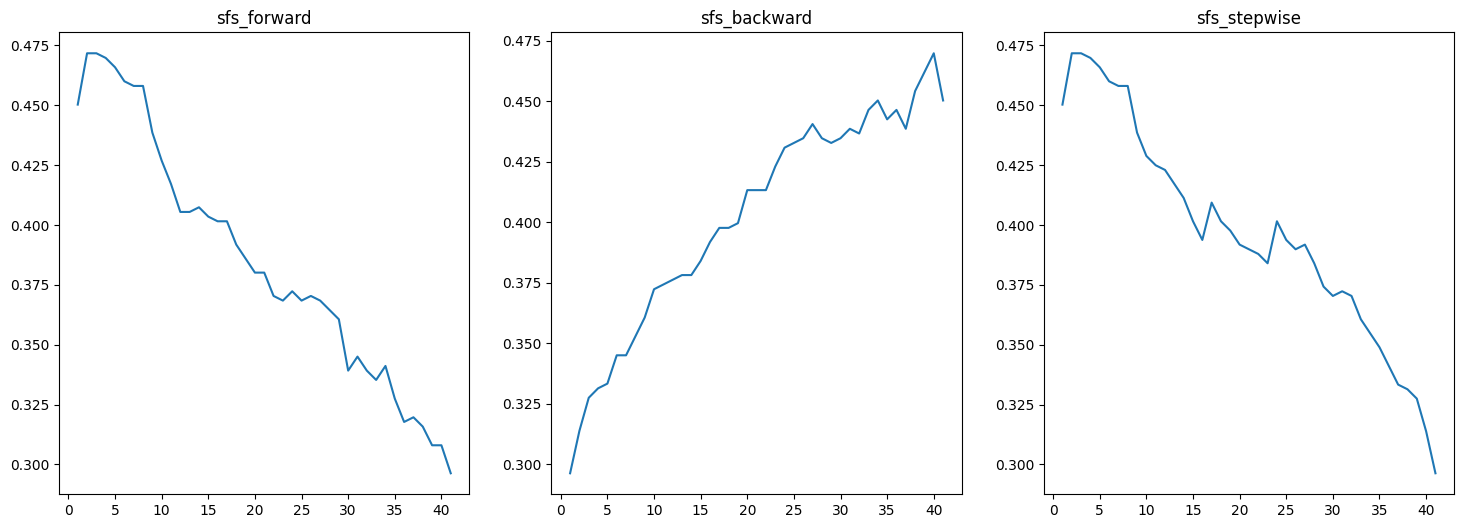

In [78]:
#시각화를 통해서 피처를 선택했을 때 어떤 식의 평가나오는지

fig, ax= plt.subplots(1,3, figsize=(18,6))
ax[0].plot(range(1, len(sfs_forward_f.subsets_)+1),[sfs_forward_f.subsets_[i]['avg_score'] for i in sfs_forward_f.subsets_],)
ax[0].set_title('sfs_forward')

ax[1].plot(range(1, len(sfs_backward_f.subsets_)+1),[sfs_backward_f.subsets_[i]['avg_score'] for i in sfs_backward_f.subsets_],)
ax[1].set_title('sfs_backward')

#fig, ax= plt.subplots(1,3, figsize=(18,6))
ax[2].plot(range(1, len(sfs_stepwise_f.subsets_)+1),[sfs_stepwise_f.subsets_[i]['avg_score'] for i in sfs_stepwise_f.subsets_],)
ax[2].set_title('sfs_stepwise')

## 피처 선택
- 공통 피처:
    - G2(2학기 성적, 모든 방법에서 선정된 가장 중요한 특징), Mjob_services(어머니 직업('서비스'))
    - 위의 두 가지 특징 중 G2는 최종 성적과 가장 밀접한 관계가 있을 것으로 보이고 Mjob_services의 경우도 포르투갈어의 성적이라는 점에서 어머니가 서비스직인 경우 자연스럽게 외국어를 접할 기회가 많아지거나, 어머니의 능력을 물려받았을 가능성이 있기 때문에 최종 성적과 관련이 있을 것으로 생각됨
    - reason_home의 경우는 집이 가까워서 학교를 선택한 것인데, 특별한 관련성을 찾기는 어렵다고 생각함

## SFS 방법 최종 선택 피처
- G2, Mjob_services

# RFECV를 통한 FeatureSelection

In [80]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 독립변수와 종속변수 설정
X = df2.drop(['G3'], axis=1) 
y = df2['G3']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 및 테스트 데이터셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=111)

# 모델 정의
models = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(kernel='linear')
}

# 하이퍼파라미터 범위 설정
param_grids = {
    'LogisticRegression': {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear'],
        'gamma': ['scale', 'auto']
    }
}

# 교차 검증 설정
cv = StratifiedKFold(3)

# 결과를 정리할 DataFrame
results = pd.DataFrame(columns=['Model', 'Dataset', 'Accuracy', 'Precision', 'Recall', 'F1', 'Selected Features'])

# 각 모델에 대해 하이퍼파라미터 튜닝 및 RFECV 수행
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # 최적의 모델 저장
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    
    # RFECV를 사용한 피처 선택
    selector = RFECV(estimator=best_model, step=1, cv=cv, scoring='accuracy')
    selector.fit(X_train, y_train)
    
    # Train 및 Test 데이터셋에 대한 평가
    for data in [('Train', X_train, y_train), ('Test', X_test, y_test)]:
        dataset_name, X_data, y_data = data
        y_pred = selector.predict(X_data)
        
        accuracy = accuracy_score(y_data, y_pred)
        precision = precision_score(y_data, y_pred, average='weighted')
        recall = recall_score(y_data, y_pred, average='weighted')
        f1 = f1_score(y_data, y_pred, average='weighted')
        
        selected_features = ', '.join(X.columns[selector.support_])
        
        # 결과를 DataFrame에 추가
        result_row = pd.DataFrame({
            'Model': [name],
            'Dataset': [dataset_name],
            'Accuracy': [accuracy],
            'Precision': [precision],
            'Recall': [recall],
            'F1': [f1],
            'Selected Features': [selected_features]
        })
        results = pd.concat([results, result_row], ignore_index=True)

# 결과 출력
print(results)

# 성능이 높은 순으로 정렬
results_sorted = results.sort_values(by=['F1', 'Accuracy'], ascending=False)
print("Sorted Results:")
print(results_sorted)

Tuning hyperparameters for LogisticRegression...
Best parameters for LogisticRegression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


I:\anaconda3\envs\test01\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yc_hur\AppData\Local\Temp\ipykernel_26532\3412944289.py:90: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)
I:\anaconda3\envs\test01\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

Tuning hyperparameters for RandomForestClassifier...
Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


I:\anaconda3\envs\test01\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
I:\anaconda3\envs\test01\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tuning hyperparameters for SVC...
Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
                    Model Dataset  Accuracy  Precision    Recall        F1  \
0      LogisticRegression   Train  0.500975   0.354516  0.500975  0.399349   
1      LogisticRegression    Test  0.395349   0.265896  0.395349  0.290045   
2  RandomForestClassifier   Train  0.518519   0.395002  0.518519  0.433598   
3  RandomForestClassifier    Test  0.434109   0.350401  0.434109  0.355542   
4                     SVC   Train  0.518519   0.511351  0.518519  0.482107   
5                     SVC    Test  0.410853   0.352620  0.410853  0.356028   

  Selected Features  
0                G2  
1                G2  
2                G2  
3                G2  
4            G1, G2  
5            G1, G2  
Sorted Results:
                    Model Dataset  Accuracy  Precision    Recall        F1  \
4                     SVC   Train  0.518519   0.511351  0.518519  0.482107   
2  RandomForestClass

I:\anaconda3\envs\test01\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
I:\anaconda3\envs\test01\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [81]:
results

,Model,Dataset,Accuracy,Precision,Recall,F1,Selected Features
0,LogisticRegression,Train,0.500975,0.354516,0.500975,0.399349,G2
1,LogisticRegression,Test,0.395349,0.265896,0.395349,0.290045,G2
2,RandomForestClassifier,Train,0.518519,0.395002,0.518519,0.433598,G2
3,RandomForestClassifier,Test,0.434109,0.350401,0.434109,0.355542,G2
4,SVC,Train,0.518519,0.511351,0.518519,0.482107,"G1, G2"
5,SVC,Test,0.410853,0.352620,0.410853,0.356028,"G1, G2"


## RFECV 방법 최종 피처 선택
- G1, G2
- 하이퍼 파라미터 튜닝을 진행했음에도 Accuracy가 매우 낮아서 제대로 된 Feature Selection이 이루어지지 않음